# 필요한 모델 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 날씨 데이터

In [2]:
# 날씨 데이터 불러오기 및 확인
weather_path = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/Weather.csv'
weather_data = pd.read_csv(weather_path)
weather_data

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,Unnamed: 10
0,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270,46.8,NaN
1,10000,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,320,36.9,NaN
2,10000,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,50,36.0,NaN
3,10000,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290,49.3,NaN
4,10000,Seoul,2020-01-24,2.8,-1.3,7.4,0.0,3.7,290,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157,10000,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180,91.0,NaN
158,10000,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230,82.1,NaN
159,10000,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250,70.4,NaN
160,10000,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270,70.5,NaN


In [3]:
print("전체 데이터 수 : ", len(weather_data))

전체 데이터 수 :  162


In [4]:
print("컬럼별 결측치 수 : ", len(weather_data) - weather_data.count())

컬럼별 결측치 수 :  code                       0
province                   0
date                       0
avg_temp                   0
min_temp                   0
max_temp                   0
precipitation              0
max_wind_speed             0
most_wind_direction        0
avg_relative_humidity      0
Unnamed: 10              161
dtype: int64


In [5]:
# 불필요한 Unnamed 컬럼 삭제
weather_data = weather_data.drop("Unnamed: 10", axis=1)
weather_data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270,46.8
1,10000,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,320,36.9
2,10000,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,50,36.0
3,10000,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290,49.3
4,10000,Seoul,2020-01-24,2.8,-1.3,7.4,0.0,3.7,290,63.0


In [6]:
# 결측치 확인
weather_data.isnull().sum()

code                     0
province                 0
date                     0
avg_temp                 0
min_temp                 0
max_temp                 0
precipitation            0
max_wind_speed           0
most_wind_direction      0
avg_relative_humidity    0
dtype: int64

In [7]:
# 중복 데이터 확인
weather_data.duplicated().sum()

0

### 필요한 컬럼만 선택한다

`data.loc[:, ['A', 'B', 'c']]`     
`data[['A', 'B', 'C']]`    
date, avg_temp, max_wind_speed, avg_relative_humidity

In [8]:
# 필요한 컬럼만 선택
weather_data = weather_data.loc[:, ['date', 'avg_temp', 'max_wind_speed', 'avg_relative_humidity']]
weather_data

,date,avg_temp,max_wind_speed,avg_relative_humidity
0,2020-01-20,0.7,5.7,46.8
1,2020-01-21,-0.4,3.5,36.9
2,2020-01-22,3.0,3.2,36.0
3,2020-01-23,4.6,4.7,49.3
4,2020-01-24,2.8,3.7,63.0
...,...,...,...,...
157,2020-06-25,21.6,4.3,91.0
158,2020-06-26,21.8,5.3,82.1
159,2020-06-27,24.1,5.4,70.4
160,2020-06-28,25.2,4.7,70.5


## 코로나 확진자 데이터

In [9]:
# 코로나 확진자 데이터 불러오기 및 확인
covid_path = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/TimeProvince.csv'
covid_data = pd.read_csv(covid_path)
covid_data

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [10]:
# 각 데이터 전처리 하기

# 코로나 진행 데이터
covid_data = covid_data[['date', 'province', 'confirmed']] # 필요한 컬럼만
covid_data = covid_data[covid_data['province']=="Seoul"] # 서울 지역만
covid_data['date'] = pd.to_datetime(covid_data['date']) # date컬럼, datetime으로 


# 날씨 데이터
weather_data = weather_data[weather_data['date']<"2020-06-30"] # 기간 정리
weather_data['date'] = pd.to_datetime(weather_data['date']) # date컬럼, datetime으로

# 두 데이터 병합
weather_time_data = pd.merge(covid_data, weather_data, on='date') 

In [11]:
# 시간별 누적 확진자 데이터 일일 데이터로 바꾸기

covid_nu = weather_time_data['confirmed']
covid_day = [0]

for i in range(1, len(covid_nu)):
  covid_day.append(covid_nu[i] - covid_nu[i-1])
covid_day = pd.DataFrame(covid_day)

# 일일 확진자 표시
weather_time_data['confirmed'] = covid_day

In [12]:
# 정리한 데이터 확인
weather_time_data

,date,province,confirmed,avg_temp,max_wind_speed,avg_relative_humidity
0,2020-01-20,Seoul,0,0.7,5.7,46.8
1,2020-01-21,Seoul,0,-0.4,3.5,36.9
2,2020-01-22,Seoul,0,3.0,3.2,36.0
3,2020-01-23,Seoul,0,4.6,4.7,49.3
4,2020-01-24,Seoul,0,2.8,3.7,63.0
...,...,...,...,...,...,...
157,2020-06-25,Seoul,9,21.6,4.3,91.0
158,2020-06-26,Seoul,17,21.8,5.3,82.1
159,2020-06-27,Seoul,17,24.1,5.4,70.4
160,2020-06-28,Seoul,14,25.2,4.7,70.5


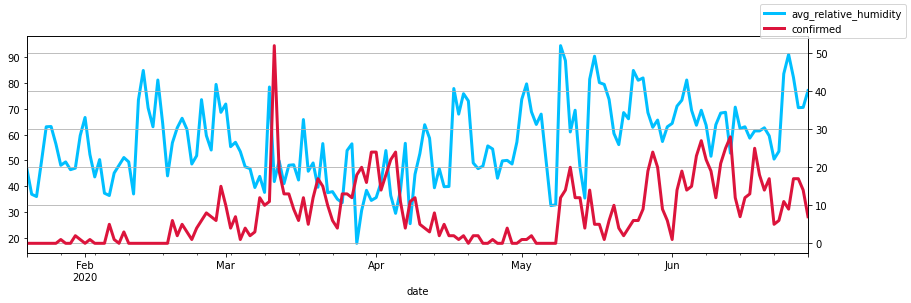

In [13]:
# 상대습도와 코로나의 관계 그래프
weather_time_data['date'] = pd.to_datetime(weather_time_data['date'])
plt.rcParams['figure.figsize']= (14,4)

ax = weather_time_data.plot(x='date', y='avg_relative_humidity', lw=3 ,legend=False, color='deepskyblue')
ax2 = ax.twinx()
weather_time_data.plot(x='date', y='confirmed', ax=ax2, lw=3, legend=False, color='crimson')
ax.figure.legend()
plt.grid()

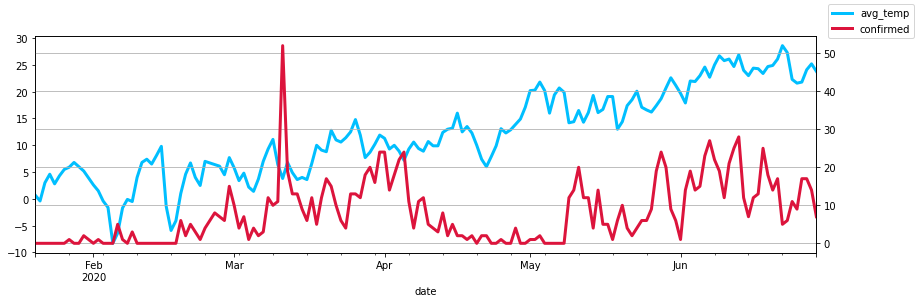

In [14]:
# 평균 기온과 코로나의 관계 그래프
weather_time_data['date'] = pd.to_datetime(weather_time_data['date'])
plt.rcParams["figure.figsize"] = (14,4)

ax = weather_time_data.plot(x="date", y="avg_temp", lw=3, legend=False,color="deepskyblue")
ax2 = ax.twinx()

weather_time_data.plot(x="date", y="confirmed", lw=3, ax=ax2, legend=False, color="crimson")
ax.figure.legend()
plt.grid()


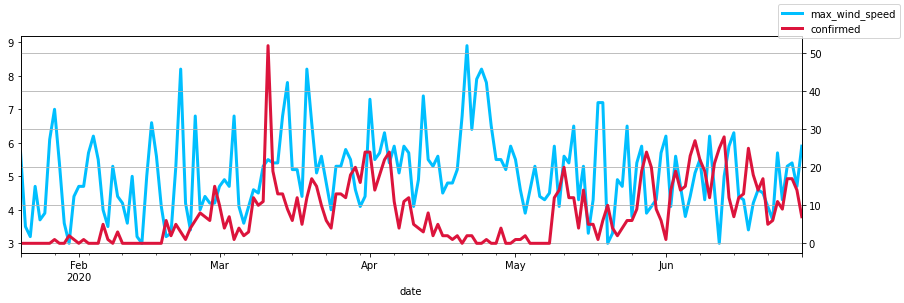

In [15]:
# 최대 풍속과 코로나의 관계 그래프
weather_time_data['date'] = pd.to_datetime(weather_time_data['date'])
plt.rcParams["figure.figsize"] = (14,4)

ax = weather_time_data.plot(x="date", y="max_wind_speed", lw=3, legend=False,color="deepskyblue")
ax2 = ax.twinx()

weather_time_data.plot(x="date", y="confirmed", ax=ax2, lw=3, legend=False, color="crimson")
ax.figure.legend()
plt.grid()
